In [19]:
using LinearAlgebra, Parameters, Plots, LaTeXStrings, Latexify
theme(:vibrant)
default(fontfamily="Computer Modern", framestyle=:box) # LaTex-style

In [13]:
include("../JuliaCode/krusell_smith.jl")

SolveModel (generic function with 1 method)

# Problem Set 5

This problem set implements an approximate equilibrium of a Aiyagari (1994) economy with aggregate uncertainty using the techniques in Krusell and Smith (1998).  

## Model Set-up

* a unit measure of agent
* the time period is one quarter
* preferences are given by:$$\sum_{t=0}^\infty \beta^t\log{c_t}$$
* $\beta = 0.99$
* The production technology is given by$$y_{t}=z_{t} k_{t}^{\alpha} l_{t}^{1-\alpha}$$
* $\alpha=0.36$
* aggregate technology shocks $z_{t} \in\left\{z_{g}=1.01, z_{b}=0.99\right\}$ are drawn from a Markov process.
* capital depreciates at rate $\delta=0.025$.
* agents have 1 unit of time.
* agents face idiosyncratic employment opportunities $\varepsilon_{t} \in\{0,1\}$ where $\varepsilon_{t}=1$ 
* if an agent is employed receives wage $w_{t} \bar{e}$ (where $\bar{e}=0.3271$ denotes labor efficiency per unit of time worked)

The probability of transition from state $(z, \varepsilon)$ to $\left(z^{\prime}, \varepsilon^{\prime}\right)$, denoted $\pi_{z z^{\prime} \varepsilon \varepsilon^{\prime}}$ must satisfy certain conditions:
$$
\pi_{z z^{\prime} 00}+\pi_{z z^{\prime} 01}=\pi_{z z^{\prime} 10}+\pi_{z z^{\prime} 11}=\pi_{z z^{\prime}}
$$
and
$$
u_{z} \frac{\pi_{z z^{\prime} 00}}{\pi_{z z^{\prime}}}+\left(1-u_{z}\right) \frac{\pi_{z z^{\prime} 10}}{\pi_{z z^{\prime}}}=u_{z^{\prime}}
$$
where $u_{z}$ denotes the fraction of those unemployed in state $z$ with $u_{g}=4 \%$ and $u_{b}=10 \%$. The other restrictions on $\pi_{z z^{\prime} \varepsilon \varepsilon^{\prime}}$ necessary to pin down the transition matrix are that: the average duration of good and bad times is 8 quarters; the average duration of unemployment spells is $1.5$ quarters in good times and $2.5$ quarters in bad times; and
$$
\frac{\pi_{g b 00}}{\pi_{g b}}=1.25 \cdot \frac{\pi_{b b 00}}{\pi_{b b}} \text { and } \frac{\pi_{b g 00}}{\pi_{b g}} 0.75 \cdot \frac{\pi_{g g 00}}{\pi_{g g}}
$$

We will start by defining a function that receives this data and returns the transition matrix. This function will be used to populate the primitives of the model at a later stage.

In [7]:
P, p = trans_mat([8.0, 8.0], [1.5, 2.5], [0.04, 0.1])

latexify(round.(P, digits=3))

L"\begin{equation}
\left[
\begin{array}{cccc}
0.851 & 0.123 & 0.583 & 0.094 \\
0.116 & 0.836 & 0.031 & 0.35 \\
0.024 & 0.002 & 0.292 & 0.031 \\
0.009 & 0.039 & 0.094 & 0.525 \\
\end{array}
\right]
\end{equation}
"

* Capital is the only asset to self insure fluctuations; households rent their capital $k_{t} \in[0, \infty)$ to firms and receive rate of return $r_{t}$. 
* Without loss of generality, we can consider one firm which hires $L_{t}$ units of labor efficiency units (so that $\left.L_{t}=\bar{e}\left(1-u_{t}\right)\right)$ and rents capital $K$ so that wages and rental rates are given by their marginal products:
$$
\begin{aligned}
w_{t} & \equiv w\left(K_{t}, L_{t}, z_{t}\right)=(1-\alpha) z_{t}\left(\frac{K_{t}}{L_{t}}\right)^{\alpha} \\
r_{t} & \equiv r\left(K_{t}, L_{t}, z_{t}\right)=\alpha z_{t}\left(\frac{K_{t}}{L_{t}}\right)^{\alpha-1}
\end{aligned}
$$


As in Krusell and Smith, approximate the true distribution $\Gamma_{t}$ over $\left(k_{t}, \varepsilon_{t}\right)$ in state $z_{t}$ by $I$ moments and let the law of motion for the moment be $$m^{\prime}=h_{I}\left(m, z, z^{\prime}\right)$$

### Initial Conditions
* Start with $z=z_g$
* 

### Initializing the model
Next we will initialize the model

In [20]:
prim, res, shocks = Initialize();

The Bellman Operator is runnig rally fast!

In [12]:
@time Bellman(prim, res, shocks)

  0.169682 seconds (602.75 k allocations: 27.123 MiB, 89.33% compilation time)


The value function iteration is also running fast

In [15]:
@time V_iterate(prim, res, shocks)

Iteration: 100 --- 0.3794018606714218
Iteration: 200 --- 0.13887332619570714
Iteration: 300 --- 0.050832128727861914
Iteration: 400 --- 0.018606203090186568
Iteration: 500 --- 0.00681047207933716
Iteration: 600 --- 0.0024928530404082494
  8.500109 seconds (202.53 M allocations: 5.847 GiB, 6.80% gc time, 0.91% compilation time)


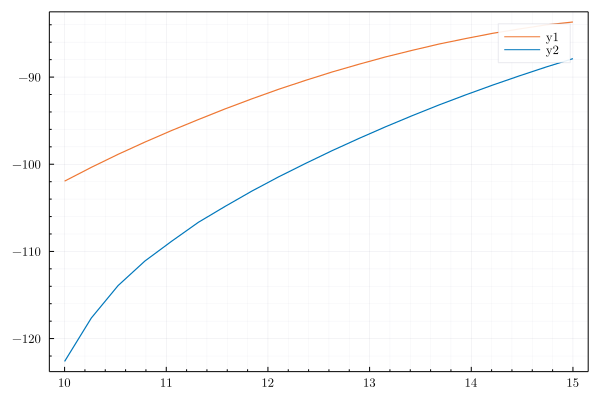

In [20]:
plot(prim.k_grid, res.val_fun[:,1,1,1])
plot!(prim.k_grid, res.val_fun[:,1,1,2])

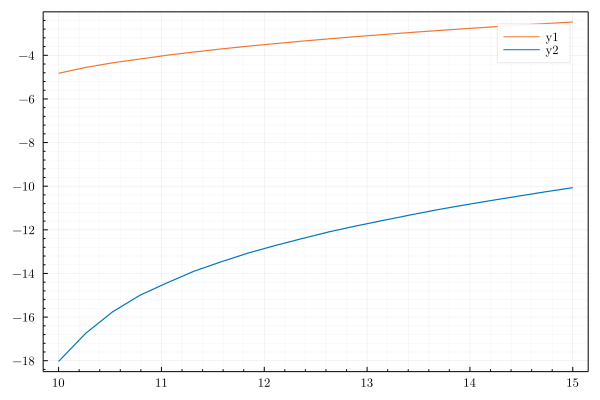

In [21]:
plot(prim.k_grid, res.val_fun[:,1,2,1])
plot!(prim.k_grid, res.val_fun[:,1,2,2])

Value functions make sense just that employed are better than unemployed, maybe we are storing it wrong

Just to be clear this is a plot with a coarse grid:

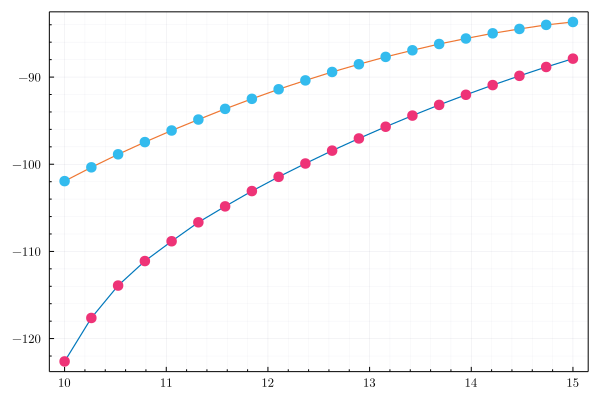

In [25]:
plot(prim.k_grid, res.val_fun[:,1,1,1], label="")
plot!(prim.k_grid, res.val_fun[:,1,1,2], label="")
scatter!(prim.k_grid, res.val_fun[:,1,1,1], label="")
scatter!(prim.k_grid, res.val_fun[:,1,1,2], label="")

I think the interpolated version will  look nicer

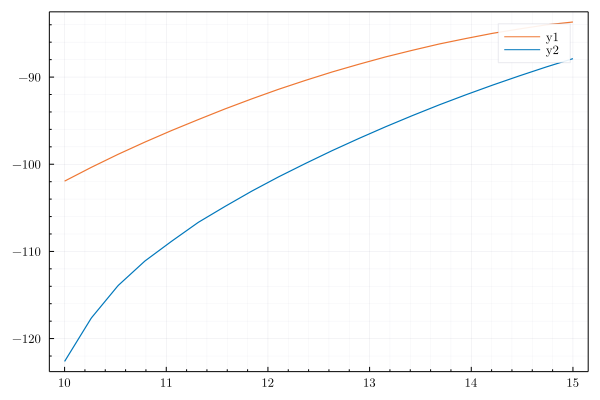

In [28]:
finner_grid = prim.k_min:0.01:prim.k_max
vf1 = res.val_fun_interp[(1,1)].(finner_grid, prim.K_grid[1])
vf2 = res.val_fun_interp[(1,2)].(finner_grid, prim.K_grid[1])

plot(finner_grid, vf1)
plot!(finner_grid, vf2)